In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pickle

In [5]:
4 * 4 * 512

8192

In [13]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=8192))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
with open('vggfeatures.h5', 'rb') as f:
    features = pickle.load(f)
with open('vgglabels.h5', 'rb') as f:
    labels = pickle.load(f)

In [9]:
with open('vggfeatures_test.h5', 'rb') as f:
    features_test = pickle.load(f)
with open('vgglabels_test.h5', 'rb') as f:
    labels_test = pickle.load(f)

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 1,048,833
Trainable params: 1,048,833
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(features, labels, epochs=30, batch_size=50, validation_data=(features_test, labels_test))

Epoch 1/30
40/40 [==============================] - 0s 12ms/step - loss: 0.4396 - accuracy: 0.7995 - val_loss: 0.3067 - val_accuracy: 0.8736
Epoch 2/30
40/40 [==============================] - 0s 11ms/step - loss: 0.2553 - accuracy: 0.8955 - val_loss: 0.3054 - val_accuracy: 0.8593
Epoch 3/30
40/40 [==============================] - 0s 10ms/step - loss: 0.2076 - accuracy: 0.9150 - val_loss: 0.2745 - val_accuracy: 0.8893
Epoch 4/30
40/40 [==============================] - 0s 10ms/step - loss: 0.1657 - accuracy: 0.9390 - val_loss: 0.2730 - val_accuracy: 0.8857
Epoch 5/30
40/40 [==============================] - 0s 10ms/step - loss: 0.1401 - accuracy: 0.9410 - val_loss: 0.2673 - val_accuracy: 0.8950
Epoch 6/30
40/40 [==============================] - 0s 11ms/step - loss: 0.1071 - accuracy: 0.9620 - val_loss: 0.2779 - val_accuracy: 0.8879
Epoch 7/30
40/40 [==============================] - 0s 10ms/step - loss: 0.1110 - accuracy: 0.9550 - val_loss: 0.2775 - val_accuracy: 0.8921
Epoch 8/30
40

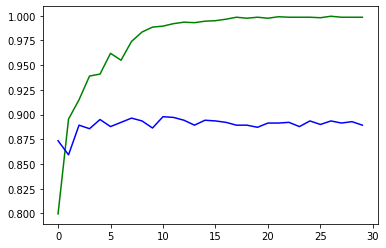

In [16]:
import matplotlib.pyplot as plt
epochs = range(30)
plt.plot(epochs, history.history['accuracy'], color='green')
plt.plot(epochs, history.history['val_accuracy'], color='blue')